In [286]:
import pandas as pd
import numpy as np

In [287]:
stock='2344'+'.tw'
data = pd.read_csv(stock+'.csv')

In [288]:
#print(data)

In [289]:
X=data.drop(labels=['Date','Low','High','Close','High_Range','Open_Range'],axis=1)
Y=data['High']

In [290]:
X_train=X[:230]
Y_train=Y[:230]

In [291]:
from sklearn import preprocessing #使用sklearn的preprocessing的MinMaxScaler進行正規化:(x-min)/(max-min)
scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_nom = scaler.transform(X_train) #執行正規化，使得特徵值範圍介於0~1
#print(X_train_nom)

Y_train = Y_train.values.reshape(-1,1) #執行reshape，使其shape為(資料長度,1)  轉換型態將series轉成numpy
scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(Y_train)
Y_train_nom = scaler.transform(Y_train) #執行正規化，使得特徵值範圍介於0~1
#print(Y_train_nom)

In [292]:
                #len(X_train)    ref_day
X_train_nom = np.reshape(X_train_nom, (X_train_nom.shape[0], X_train_nom.shape[1], 1))  #將原本為ref_day[,,,,,]轉為[[],[],[],[],[],[]]


In [293]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling
regressor.compile(optimizer = 'adam', loss="mean_absolute_error",metrics=['mean_absolute_error'])

# 進行訓練
train_history=regressor.fit(X_train_nom, Y_train_nom, epochs = 200, batch_size = 8,verbose=1,validation_split=0.2)

Train on 184 samples, validate on 46 samples
Epoch 1/200
184/184 [==============================] - 2s 10ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - val_loss: 0.7168 - val_mean_absolute_error: 0.7168
Epoch 2/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - val_loss: 0.5289 - val_mean_absolute_error: 0.5289
Epoch 3/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455
Epoch 4/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - val_loss: 0.0781 - val_mean_absolute_error: 0.0781
Epoch 5/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585
Epoch 6/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - val_loss: 0.085

184/184 [==============================] - 0s 2ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 100/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.1395 - val_mean_absolute_error: 0.1395
Epoch 101/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - val_loss: 0.1388 - val_mean_absolute_error: 0.1388
Epoch 102/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230
Epoch 103/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.0626 - val_mean_absolute_error: 0.0626
Epoch 104/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - val_loss: 0.1296 - val_mean_absolute_error: 0.1296
Epoch 105/20

184/184 [==============================] - 0s 1ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - val_loss: 0.0427 - val_mean_absolute_error: 0.0427
Epoch 198/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 199/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - val_loss: 0.0907 - val_mean_absolute_error: 0.0907
Epoch 200/200
184/184 [==============================] - 0s 1ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.1998 - val_mean_absolute_error: 0.1998


In [294]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation): #train_history訓練過程；train訓練結果；validation驗證結果
    plt.plot(train_history.history[train]) #描繪訓練結果
    plt.plot(train_history.history[validation]) #描繪驗證結果
    plt.title('Train History') #圖標題
    plt.ylabel(train) #y軸標籤
    plt.xlabel('Epoch') #x軸標籤
    plt.legend(['train', 'validation'], loc='upper left') #設定訓練與驗證之圖例及位置
    plt.show()

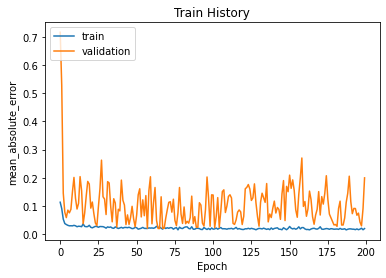

In [295]:
show_train_history(train_history,'mean_absolute_error','val_mean_absolute_error')

In [296]:
X_test=X[230:]
Y_test=Y[230:]

In [297]:
X_scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_test)
X_test_nom = X_scaler.transform(X_test) #執行正規化，使得特徵值範圍介於0~1
#print(X_train_nom)

Y_test = Y_test.values.reshape(-1,1) #執行reshape，使其shape為(資料長度,1)  轉換型態將series轉成numpy
scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(Y_test)
Y_test_nom = scaler.transform(Y_test) #執行正規化，使得特徵值範圍介於0~1
#print(Y_train_nom)

In [298]:
                #len(X_train)    ref_day
X_test_nom = np.reshape(X_test_nom, (X_test_nom.shape[0], X_test_nom.shape[1], 1))  #將原本為ref_day[,,,,,]轉為[[],[],[],[],[],[]]


In [299]:
scores = regressor.evaluate(X_test_nom, Y_test_nom, verbose=1) #使用model.evaluate進行模型評估，評估後的績效指標會儲存於scores
scores[1] #傳回測試資料的mean_absolute_error

18/18 [==============================] - 0s 12ms/step


0.05370262637734413

In [300]:
Y_test_predict=regressor.predict(X_test_nom) #測試資料預測結果
Y_test_predict_price = scaler.inverse_transform(Y_test_predict) # 將正規化預測值轉換為股票價格
date=data['Date'][230:]
date=np.array(date)
O=data['Open'][230:]
O=np.array(O)
for i in range(len(date)):
    Y_test_predict_price[i]-=1

In [301]:
def show_test_result(Open,Real,Predict):
    plt.figure(figsize=(10,10))
    
   
    plt.plot(date,Predict)
    
    plt.plot(Open, color="green", label="Open Price")
    plt.plot(Real, color="red", label="Real Price") #描繪測試資料真實股價
    plt.plot(Predict, color="blue", label="Predicted Price") #描繪測試資料預測股價
  
    
    plt.title('Stock Prediction '+stock)
    plt.ylabel('Price') 
    plt.xlabel('Date') 
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
    

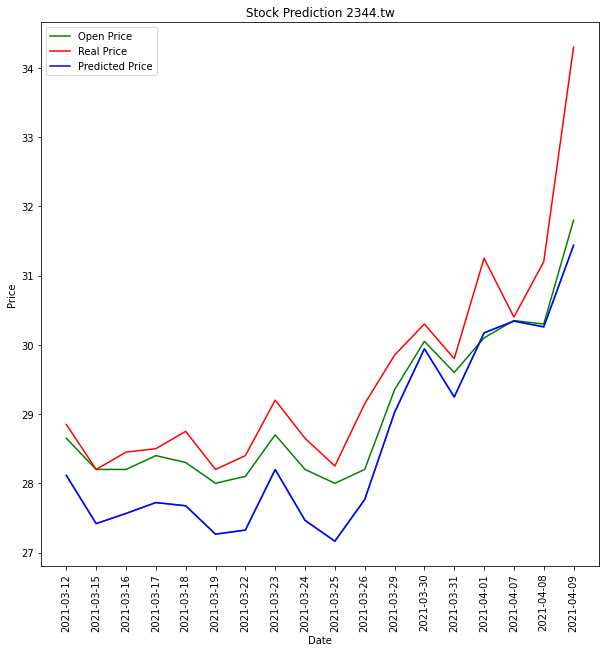

In [302]:
show_test_result(O,Y_test,Y_test_predict_price) #結果若不錯，代表可以使用此模型預測某支股票的股價